<a href="https://colab.research.google.com/github/khasanahdesi/Data-Science/blob/algoritmakmeans/Analisis_Kpadatan_Penduduk_Menggunkan_Algoritma_K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Berdasarkan Jumlah Penduduk Per Kecamatan Pada Mei 2020 di Kabupaten Cilacap

Studi kasus tingkat kepadatan penduduk berdasarkan jenis kelamin pada masing-masing kecamatan di Kabupaten Cilacap

http://data.cilacapkab.go.id/dataset


# Import Library 

In [ ]:
#import library untuk membantu dalam pengolahan data
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import pandas as pd
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from sklearn import preprocessing
from sklearn.cluster import KMeans

# Tahapan Pre Processing Data

In [ ]:
#Membaca Dataset dan menampilkan dataset
data = pd.read_excel("Penduduk Kabupaten Cilacap 2020-Mei.xlsx")
data

,No,Wilayah,L,P,Jumlah Penduduk
0,1,KEDUNGREJA,44056,42873,86929
1,2,KESUGIHAN,66696,64587,131283
2,3,ADIPALA,47309,46000,93309
3,4,BINANGUN,34291,33635,67926
4,5,NUSAWUNGU,42873,41856,84729
5,6,KROYA,57687,56432,114119
6,7,MAOS,23291,23381,46672
7,8,JERUKLEGI,38089,37067,75156
8,9,KAWUNGANTEN,43099,41606,84705
9,10,GANDRUNGMANGU,55684,53647,109331


In [ ]:
# MELAKUKAN PENGECEKAN MISSING VALUE PADA DATA

data.isna().sum()

No                 0
Wilayah            0
L                  0
P                  0
Jumlah Penduduk    0
dtype: int64

data penduduk diatas tidak terdapat missing value

In [ ]:
#MELIHAT DISTRIBUSI DARI DATA

data.describe()

,No,L,P,Jumlah Penduduk
count,24.000000,24.000000,24.000000,24.000000
mean,12.500000,40822.708333,39903.416667,80726.125000
std,7.071068,14568.031351,14118.341428,28682.693586
min,1.000000,8131.000000,7435.000000,15566.000000
25%,6.750000,32735.750000,32046.500000,64782.250000
50%,12.500000,42048.500000,41194.500000,83422.000000
75%,18.250000,48668.500000,47291.000000,96034.750000
max,24.000000,69784.000000,68692.000000,138476.000000


In [ ]:
#Pengambilan data yang berupa angka

X = np.array(data.iloc[:, 2:5])
print(X)

[[ 44056  42873  86929]
 [ 66696  64587 131283]
 [ 47309  46000  93309]
 [ 34291  33635  67926]
 [ 42873  41856  84729]
 [ 57687  56432 114119]
 [ 23291  23381  46672]
 [ 38089  37067  75156]
 [ 43099  41606  84705]
 [ 55684  53647 109331]
 [ 31235  31070  62305]
 [ 40681  39390  80071]
 [ 53048  51164 104212]
 [ 69784  68692 138476]
 [ 52747  52024 104771]
 [ 24314  24874  49188]
 [ 21568  21450  43018]
 [ 33236  32372  65608]
 [ 24836  24452  49288]
 [ 37305  36126  73431]
 [ 42585  41964  84549]
 [ 45688  44802  90490]
 [ 41512  40783  82295]
 [  8131   7435  15566]]


# PROSES SCALING DATA

In [ ]:
#TAHAPAN DALAM MELAKUKAN NORMALISASI DATA MENGGUNAKAN MIN MAX SCALER
scaler = MinMaxScaler()
x_scaled=scaler.fit_transform(data.drop('Wilayah',axis=1))
x_scaled

array([[0.        , 0.58269671, 0.57851348, 0.58061183],
       [0.04347826, 0.94991322, 0.93298725, 0.9414775 ],
       [0.08695652, 0.63545975, 0.6295607 , 0.63251973],
       [0.13043478, 0.42431025, 0.42770622, 0.42600277],
       [0.17391304, 0.56350867, 0.56191129, 0.56271255],
       [0.2173913 , 0.80378895, 0.79985961, 0.80183061],
       [0.26086957, 0.24589233, 0.26031311, 0.25307949],
       [0.30434783, 0.48591309, 0.48373247, 0.4848263 ],
       [0.34782609, 0.56717435, 0.55783013, 0.56251729],
       [0.39130435, 0.77130067, 0.75439542, 0.76287527],
       [0.43478261, 0.37474251, 0.38583346, 0.38027012],
       [0.47826087, 0.52795484, 0.52165467, 0.52481491],
       [0.52173913, 0.72854525, 0.71386127, 0.72122691],
       [0.56521739, 1.        , 1.        , 1.        ],
       [0.60869565, 0.72366308, 0.72790048, 0.72577496],
       [0.65217391, 0.2624852 , 0.28468583, 0.27354975],
       [0.69565217, 0.2179456 , 0.22879018, 0.22335042],
       [0.73913043, 0.40719835,

# Menentukan Jumlah Cluster yang akan digunakan untuk anaslisa data emnggunakan metode Elbow


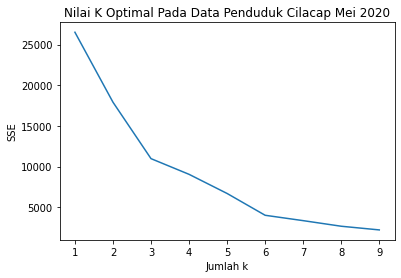

In [ ]:
SSE =[] #menyimpan nilai k terbaik dengan melakukan perhitungan SSE
K = range (1,10)
for k in K:
  kmeanModel = KMeans(n_clusters=k).fit(X) #pemodelan k-means
  kmeanModel.fit(X) #proses clustering
  SSE.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,'euclidean'),axis=1))/X.shape[0])

#Menampilkan grafik elbow
plt.plot(K,SSE,'-')
plt.xlabel('Jumlah k')
plt.ylabel('SSE')
plt.title('Nilai K Optimal Pada Data Penduduk Cilacap Mei 2020')
plt.show()

berdasarkan grafik diatas yang menunjukan elbow atau siku terera pada k =3 dan k =6. Oleh karena itu diperoleh nilai cluster yang terbaik adalah k=6, karena semakin besar nilai k semakin semakin baik.

# Melakukan KMeans klastering Menggunakan Nilai k = 6

In [ ]:
# MENENTUKAN NILAI CETEROID UNTUK MASING-MASING CLUSTER
model = KMeans(n_clusters=6, random_state=42).fit(x_scaled)
print(model.cluster_centers_)


[[0.89130435 0.54565877 0.546611   0.54613335]
 [0.2173913  0.54100252 0.53727271 0.53914362]
 [0.5942029  0.29653599 0.30741793 0.30195943]
 [0.52173913 0.80587725 0.79903929 0.80246929]
 [0.13043478 0.87685109 0.86642343 0.87165406]
 [1.         0.         0.         0.        ]]


In [ ]:
# MEMPEROLEH KOLOM BARU BERUPA KOLOM CLUSTER
data['cluster']=model.labels_
data

,No,Wilayah,L,P,Jumlah Penduduk,cluster
0,1,KEDUNGREJA,44056,42873,86929,1
1,2,KESUGIHAN,66696,64587,131283,4
2,3,ADIPALA,47309,46000,93309,1
3,4,BINANGUN,34291,33635,67926,1
4,5,NUSAWUNGU,42873,41856,84729,1
5,6,KROYA,57687,56432,114119,4
6,7,MAOS,23291,23381,46672,2
7,8,JERUKLEGI,38089,37067,75156,1
8,9,KAWUNGANTEN,43099,41606,84705,1
9,10,GANDRUNGMANGU,55684,53647,109331,3


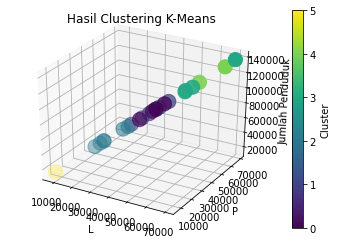

In [ ]:
#Visualisasi data

x1 = np.array(data.iloc[:,2])
x2 = np.array(data.iloc[:,3])
x3 = np.array(data.iloc[:,4])
cluster = np.array(data.iloc[:,5])

ax = plt.axes(projection='3d')
sc=ax.scatter(x1,x2,x3, s=200,c=cluster, cmap='viridis')
ax.set_xlabel('L')
ax.set_ylabel('P')
ax.set_zlabel('Jumlah Penduduk')
cbar = plt.colorbar(sc)
cbar.set_label("Cluster")
plt.title('Hasil Clustering K-Means')
plt.show()

Berdasarkan hasil visualisasi data diatas berdasarkan nilai k=6 memeproleh kelompok cluster sebanyak 6 cluster dengan kepadatan penduduk paling banyak adalah cluster 1. Dataset ini termasuk datset yang tidak homogen. karena masih terdpat kelompok data yang bergabung dengan kelompok cluster yang lain 

In [ ]:
# MENENTUKAN NILAI CETEROID UNTUK MASING-MASING CLUSTER
model = KMeans(n_clusters=3, random_state=42).fit(x_scaled)
print(model.cluster_centers_)


[[0.39130435 0.82953519 0.82150067 0.82553088]
 [0.24637681 0.48973917 0.48967284 0.48970611]
 [0.82608696 0.37124624 0.37608944 0.37366004]]


In [ ]:
# MEMPEROLEH KOLOM BARU BERUPA KOLOM CLUSTER
data['cluster']=model.labels_
data

,No,Wilayah,L,P,Jumlah Penduduk,cluster
0,1,KEDUNGREJA,44056,42873,86929,1
1,2,KESUGIHAN,66696,64587,131283,0
2,3,ADIPALA,47309,46000,93309,1
3,4,BINANGUN,34291,33635,67926,1
4,5,NUSAWUNGU,42873,41856,84729,1
5,6,KROYA,57687,56432,114119,0
6,7,MAOS,23291,23381,46672,1
7,8,JERUKLEGI,38089,37067,75156,1
8,9,KAWUNGANTEN,43099,41606,84705,1
9,10,GANDRUNGMANGU,55684,53647,109331,0


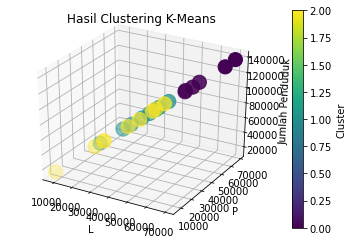

In [ ]:
#Visualisasi data

x1 = np.array(data.iloc[:,2])
x2 = np.array(data.iloc[:,3])
x3 = np.array(data.iloc[:,4])
cluster = np.array(data.iloc[:,5])

ax = plt.axes(projection='3d')
sc=ax.scatter(x1,x2,x3, s=200,c=cluster, cmap='viridis')
ax.set_xlabel('L')
ax.set_ylabel('P')
ax.set_zlabel('Jumlah Penduduk')
cbar = plt.colorbar(sc)
cbar.set_label("Cluster")
plt.title('Hasil Clustering K-Means')
plt.show()

Berdasarkan hasil visualisasi data diatas berdasarkan nilai k=3 memeproleh kelompok cluster sebanyak 3 cluster dengan kepadatan penduduk paling banyak adalah cluster 1 dan 2. Dataset ini termasuk datset yang tidak homogen. karena masih terdpat kelompok data yang bergabung dengan kelompok cluster yang lain